<a href="https://colab.research.google.com/github/ReymonDwiTandiboro/DataMining_UAS/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# connect colab ke g drive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
# 1. Import library yang diperlukan
import os
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda.
# Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = "drive/My Drive"

In [4]:
# 2. Membaca data dan melakukan seleksi data
# Misalkan kita punya file CSV dengan kolom: Date, Open, High, Low, Close, Volume, Adj Close
# Ubah "nama_file.csv" dengan nama file data yang sebenarnya
data = pd.read_csv(os.path.join(path, "GOTO.JK.csv"))
# Menampilkan beberapa baris pertama data
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/11/2022,400,442,360,376,376,2.023702e+10
1,4/18/2022,376,380,330,340,340,1.846390e+10
2,4/25/2022,318,348,270,272,272,8.162472e+09
3,5/2/2022,272,272,272,272,272,NaN
4,5/9/2022,254,270,194,194,194,4.485354e+09
5,5/16/2022,187,314,181,304,304,1.975154e+10
6,5/23/2022,324,324,276,312,312,1.531098e+10
7,5/30/2022,318,364,300,354,354,1.426304e+10
8,6/6/2022,352,404,310,386,386,2.858219e+10
9,6/13/2022,378,416,366,366,366,1.970314e+10


In [5]:
data = pd.read_csv(os.path.join(path, "GOTO.JK.csv"),index_col= 'Date')
print(data.head(5))
data.info()
data.index = pd.to_datetime(data.index)
print(data.index)
data.head(5)

           Open  High  Low  Close  Adj Close        Volume
Date                                                      
4/11/2022   400   442  360    376        376  2.023702e+10
4/18/2022   376   380  330    340        340  1.846390e+10
4/25/2022   318   348  270    272        272  8.162472e+09
5/2/2022    272   272  272    272        272           NaN
5/9/2022    254   270  194    194        194  4.485354e+09
<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 4/11/2022 to 7/10/2023
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       66 non-null     int64  
 1   High       66 non-null     int64  
 2   Low        66 non-null     int64  
 3   Close      66 non-null     int64  
 4   Adj Close  66 non-null     int64  
 5   Volume     65 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 3.6+ KB
DatetimeIndex(['2022-04-11', '2022-04-18', '2022-04-25', '2022-05-02',
               '2022-05-09', '202

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-11,400,442,360,376,376,2.023702e+10
2022-04-18,376,380,330,340,340,1.846390e+10
2022-04-25,318,348,270,272,272,8.162472e+09
2022-05-02,272,272,272,272,272,NaN
2022-05-09,254,270,194,194,194,4.485354e+09


In [6]:
# Memeriksa data yang hilang
print(data.isnull().sum())

# Mengisi data yang hilang jika ada
# Misalnya, jika ada data yang hilang di kolom 'Open', bisa diisi dengan rata-rata dari kolom tersebut
data['Volume'].fillna(data['Volume'].mean(), inplace=True)
data

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       1
dtype: int64


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-11,400,442,360,376,376,2.023702e+10
2022-04-18,376,380,330,340,340,1.846390e+10
2022-04-25,318,348,270,272,272,8.162472e+09
2022-05-02,272,272,272,272,272,1.333230e+10
2022-05-09,254,270,194,194,194,4.485354e+09
...,...,...,...,...,...,...
2023-06-12,126,127,114,117,117,1.888514e+10
2023-06-19,119,119,113,113,113,8.888648e+09
2023-06-26,112,114,109,110,110,6.550604e+09


In [7]:
data.drop('Adj Close', axis=1, inplace=True)
print(data)

            Open  High  Low  Close        Volume
Date                                            
2022-04-11   400   442  360    376  2.023702e+10
2022-04-18   376   380  330    340  1.846390e+10
2022-04-25   318   348  270    272  8.162472e+09
2022-05-02   272   272  272    272  1.333230e+10
2022-05-09   254   270  194    194  4.485354e+09
...          ...   ...  ...    ...           ...
2023-06-12   126   127  114    117  1.888514e+10
2023-06-19   119   119  113    113  8.888648e+09
2023-06-26   112   114  109    110  6.550604e+09
2023-07-03   110   112  107    108  7.902139e+09
2023-07-10   108   110  105    109  7.291290e+09

[66 rows x 5 columns]


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Data sebelum transformasi
print("Data sebelum transformasi:")
print(data.head())

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada fitur (X)
X_normalized = scaler.fit_transform(data)

# Ubah hasil normalisasi menjadi DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=data.columns)

# Data setelah transformasi
print("\nData setelah transformasi:")
print(X_normalized_df.head())

Data sebelum transformasi:
            Open  High  Low  Close        Volume
Date                                            
2022-04-11   400   442  360    376  2.023702e+10
2022-04-18   376   380  330    340  1.846390e+10
2022-04-25   318   348  270    272  8.162472e+09
2022-05-02   272   272  272    272  1.333230e+10
2022-05-09   254   270  194    194  4.485354e+09

Data setelah transformasi:
       Open      High       Low     Close    Volume
0  1.000000  1.000000  0.978947  0.947712  0.250404
1  0.923567  0.821326  0.873684  0.830065  0.226867
2  0.738854  0.729107  0.663158  0.607843  0.090120
3  0.592357  0.510086  0.670175  0.607843  0.158747
4  0.535032  0.504323  0.396491  0.352941  0.041309


In [9]:
# Step 4: Mining Data (Membuat model ARIMA dan prediksi)
# Misalkan kita akan menggunakan kolom 'Close' untuk membuat model ARIMA dan melakukan prediksi.

# Konversi kolom 'Close' menjadi series waktu
data_close = pd.Series(data['Close'].values, index = data.index)

# Membagi data menjadi data training dan data testing
#import random
train_size = int(len(data_close) * 0.8)
train, test = data_close[:train_size], data_close[train_size:]

# Membuat model ARIMA (p,q,d) dengan nilai p, q, dan d yang sesuai untuk data Anda
# Misalnya, kita akan menggunakan p=1, q=2, dan d=1
model = ARIMA(train, order=(3, 1, 1))
model_fit = model.fit()

# Melakukan prediksi pada data testing
predictions = model_fit.forecast(steps=len(test))
#predictions = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

In [10]:
# Menampilkan tabel hasil prediksi
results_df = pd.DataFrame({'Date': test.index, 'Nilai Close Asli': test.values, 'Prediksi': predictions})
results_df.reset_index(drop=True, inplace=True)
print(results_df)

         Date  Nilai Close Asli    Prediksi
0  2023-04-10                92   99.979209
1  2023-04-17                95   99.395501
2  2023-04-24               104  102.185084
3  2023-05-01               106  104.208290
4  2023-05-08               116  106.632049
5  2023-05-15               115  107.595578
6  2023-05-22               104  108.096866
7  2023-05-29               147  107.665601
8  2023-06-05               127  107.132973
9  2023-06-12               117  106.440154
10 2023-06-19               113  106.019844
11 2023-06-26               110  105.764990
12 2023-07-03               108  105.771481
13 2023-07-10               109  105.877380


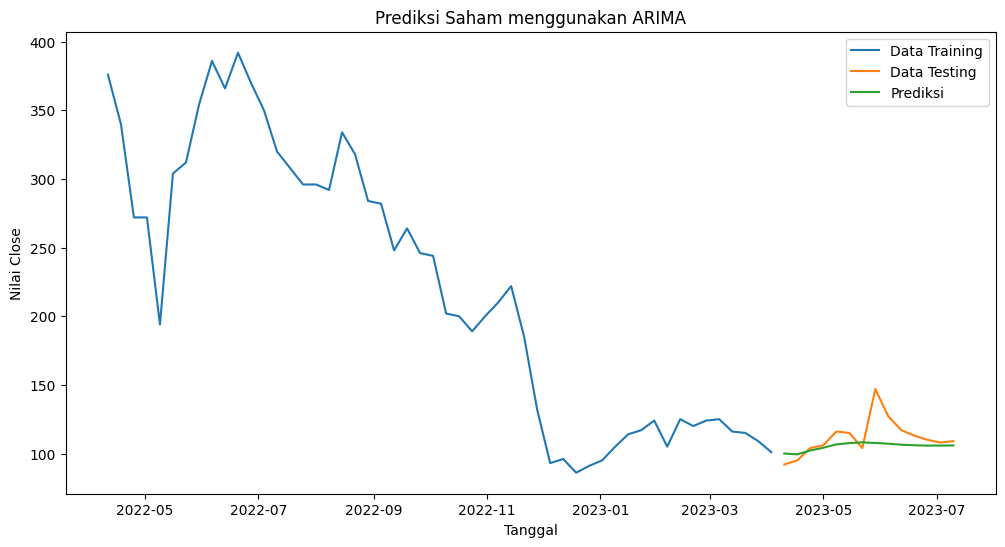

In [11]:
# Step 5: Tampilkan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Data Training')
plt.plot(test.index, test.values, label='Data Testing')
plt.plot(test.index, predictions, label='Prediksi')
plt.legend(loc='best')
plt.title('Prediksi Saham menggunakan ARIMA')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Close')
plt.show()

In [12]:
# Step 6: Evaluation
# Evaluasi model dengan R-squared, MSE, RMSE, dan MAPE
r_squared = r2_score(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - predictions) / test)) * 100

print(f'R-squared: {r_squared}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

R-squared: -0.0010185522312953221
Mean Squared Error: 170.2599769170137
Root Mean Squared Error: 13.048370661389631
Mean Absolute Percentage Error (MAPE): 7.26%
